In [67]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt




#Define dtypes to cast on each column.
dtypes = { "Make": "category",
          "Model":"category",
          "Vehicle Class":"category",
          "Engine Size(L)":"float",
          "Cylinders":"category",
          "Transmission":"category",
          "Fuel Type":"category",
          "Fuel Consumption City (L/100 km)":np.float64,
          "Fuel Consumption Hwy (L/100 km)":np.float64,
          "Fuel Consumption Comb (L/100 km)":np.float64,
          "Fuel Consumption Comb (mpg)":np.float64,
          "CO2 Emissions(g/km)":np.float64}

Dataset = pd.read_csv("CO2Emission.csv", 
                      sep=';', dtype = dtypes, decimal = ",")

n_rows:int  = Dataset.shape[0]



target_var: str = "CO2 Emissions(g/km)"
target_var_discr: str = "CO2 Emissions(g/km)_disc"

#Take the target variable column and  change its dimension to 2.
target_var_col = Dataset[target_var].to_numpy().reshape(-1,1)




### Statystyka opisowa zmiennych kategorycznych.


### 1) Częstość występowania klas.

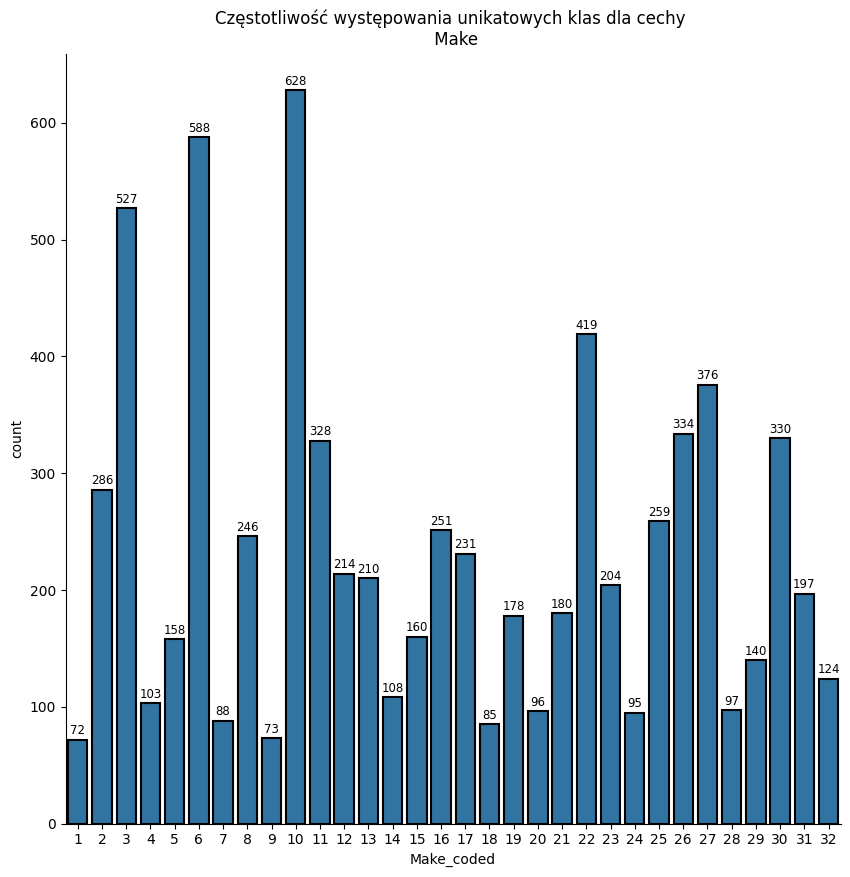

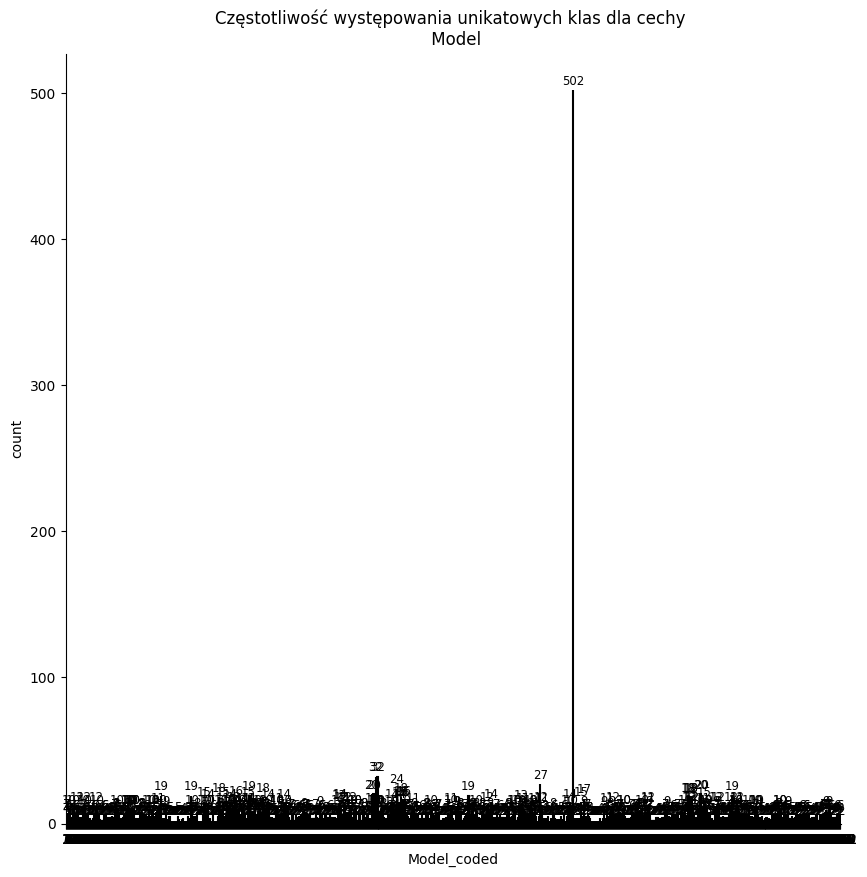

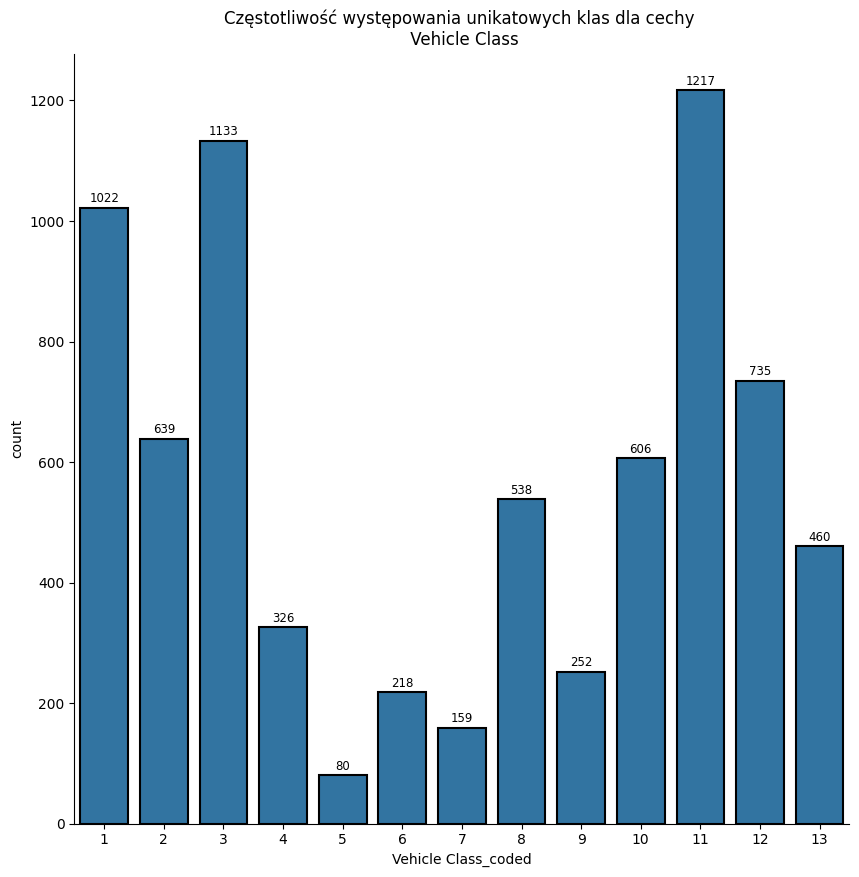

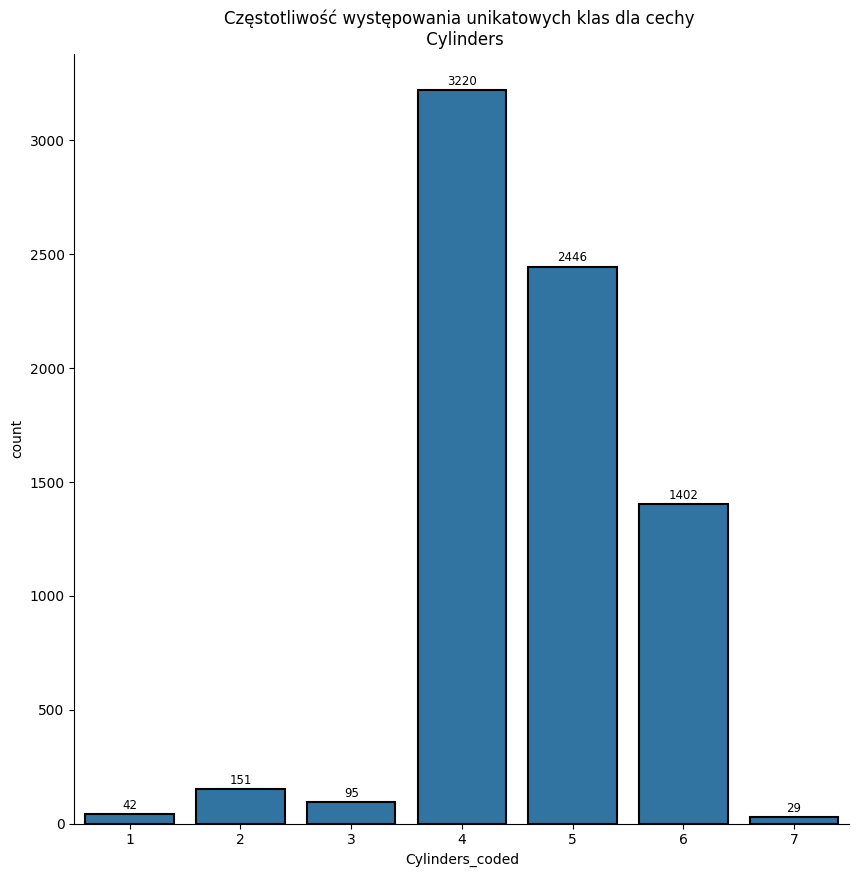

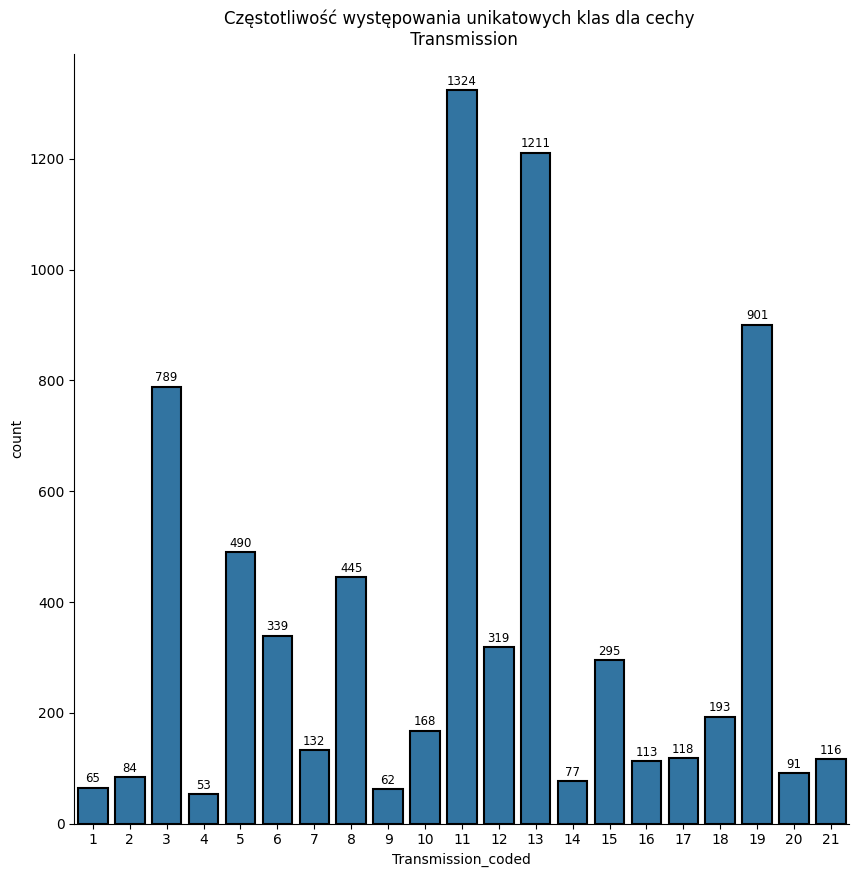

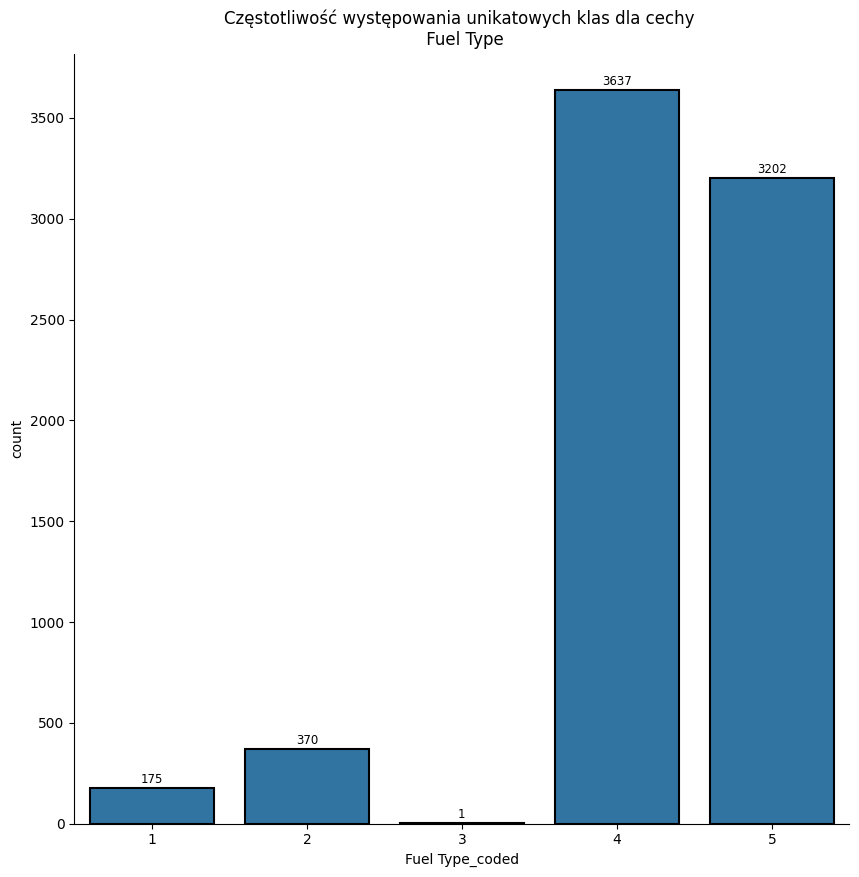

In [68]:

def CreateBarPlot(Data,  CatFeature:str, code: bool = True) -> None:
    

    if code == True:
        axes = sns.barplot(data = Data, 
        x = f"{CatFeature}_coded", y = "count", linewidth = 1.5, edgecolor = "black",)
    else:
        axes = sns.barplot(data = Data, 
        x = f"{CatFeature}", y = "count", linewidth = 1.5, edgecolor = "black",)



  

    #Ustaw ładny tytuł.
    axes.set_title(f"Częstotliwość występowania unikatowych klas dla cechy \n {CatFeature}")
    
    axes.spines[["top","right"]].set_visible(False)
    
    axes.bar_label(axes.containers[0], labels = Data["count"], fontsize = 8.5, padding = 1.75)

    

CatFeatures: list[str] = Dataset.select_dtypes(include = "category").columns



for CatFeature in CatFeatures:
    
    CatFeature_Figure = plt.figure(num = CatFeature,
                                   figsize = (10, 10))
    CatFeature_axes = CatFeature_Figure.add_subplot()
    
    HistogramSet = Dataset[CatFeature].value_counts(sort = False).reset_index()

    #Policz próg częstotliowści poniżej którego klasa będzie interpretowana jako "bardzo rzadka".
    #Tym progiem jest kwantyl rzędu 0.25 dla liczb częstości występowania.
    frequent_threshold: float = np.quantile(HistogramSet['count'], q = 0.25)



    #Aggregate the rarest class (that is - those whose frequency is less than frequen_threshold)

    HistogramSet[CatFeature] = HistogramSet.apply(func = 
                                         lambda x: "Other" if x["count"] < frequent_threshold else  x[CatFeature], 
                                         axis = 1)
    


    #The sum functions effectively deals with the class "Other". For other classes, the result of sum
    #function is just the frequency of a one class.
    HistogramSet = HistogramSet.groupby(by = CatFeature, 
                                        as_index = False).agg(func = {"count":"sum"})
    

    HistogramSet[f"{CatFeature}_coded"] = np.arange(1, len(HistogramSet)+1, step = 1, dtype = np.int16)

    CreateBarPlot(HistogramSet, CatFeature)





    



### Liczba unikatowych klas każdej cechy kategorycznej, kwartyl rzędu 25, liczba outliersów.


In [75]:
UniQuanOut_Comparison = pd.DataFrame(columns = CatFeatures, index = ['unique_classes','Ratio','25th-quartile','n_outliers','n_outliers/n_total'])

for CatFeature in CatFeatures:
    CatHistogram:pd.DataFrame = Dataset[CatFeature].value_counts(sort = False).reset_index()


    n_uniqueclass:int = CatHistogram.shape[0]
    frequent_threshold:float = round(CatHistogram["count"].quantile(q = 0.25),4)
    n_uniqueclass:int = CatHistogram.shape[0]

    n_uniqueclass_ratio:float = 100*round(n_uniqueclass/Dataset.shape[0],4)


    n_outliers:int = (CatHistogram['count']<=frequent_threshold).sum()
    n_outliers_ratio:float = 100*round(n_outliers/n_uniqueclass, 4)

    UniQuanOut_Comparison.loc[:, CatFeature] = [n_uniqueclass, n_uniqueclass_ratio, frequent_threshold, n_outliers, n_outliers_ratio]

print(UniQuanOut_Comparison)


                     Make  Model Vehicle Class Cylinders Transmission  \
unique_classes         42   2053            16         8           27   
Ratio                0.57   27.8          0.22      0.11         0.37   
25th-quartile       63.75    2.0         79.25      38.0         46.0   
n_outliers             11   1107             4         2            7   
n_outliers/n_total  26.19  53.92          25.0      25.0        25.93   

                   Fuel Type  
unique_classes             5  
Ratio                   0.07  
25th-quartile          175.0  
n_outliers                 2  
n_outliers/n_total      40.0  


### Badanie zależności poziomu emisji dwutlenku węgla w zależności od wielkości spalania paliwa na autostradzie i w mieście dla różnych typów paliwa.


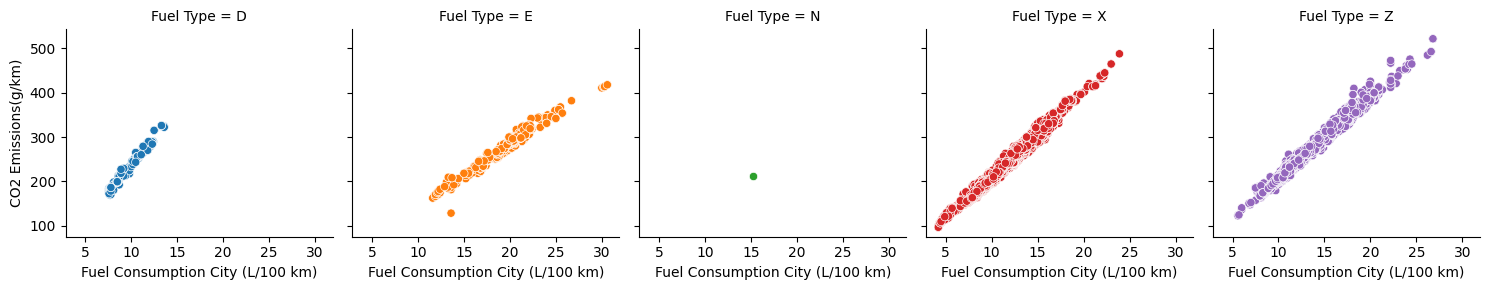

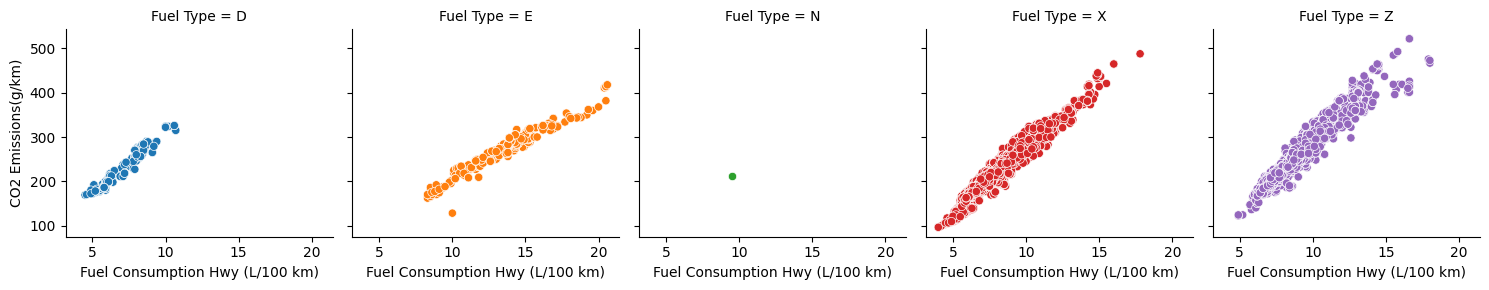

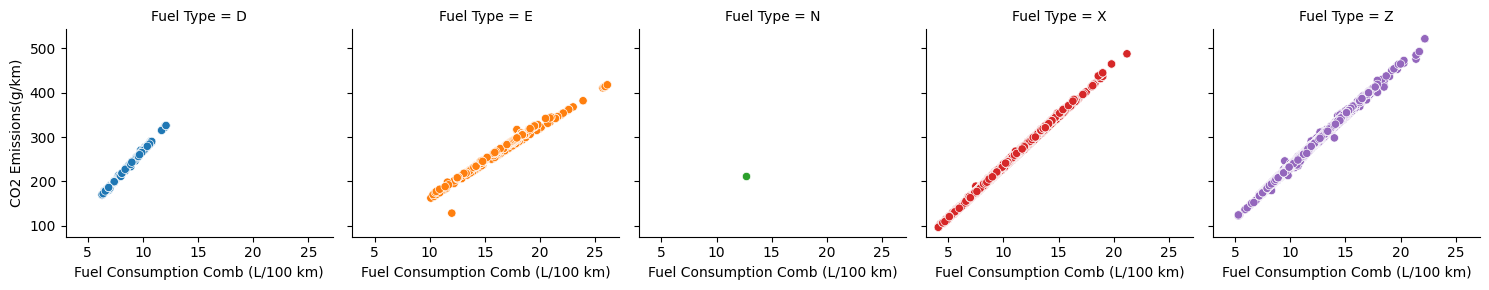

In [70]:
import seaborn as sns



#Stwórz siatkę wykresów dla zmiennej x Zuzycie paliwa na mieście.
sns.FacetGrid(data = Dataset, col = "Fuel Type").map_dataframe(sns.scatterplot, 
                        data = Dataset, 
                        x="Fuel Consumption City (L/100 km)",  
                        y = "CO2 Emissions(g/km)", 
                        hue = "Fuel Type")


#Stwórz siatkę wykresów dla zmiennej x Zuzycie paliwa na autostradzie.
sns.FacetGrid(data = Dataset, col = "Fuel Type").map_dataframe(sns.scatterplot, 
                        data = Dataset, 
                        x="Fuel Consumption Hwy (L/100 km)",  
                        y = "CO2 Emissions(g/km)", 
                        hue = "Fuel Type")

#Stwórz siatkę wykresów dla zmiennej x Zuzycie paliwa zmiksowane.
sns.FacetGrid(data = Dataset, col = "Fuel Type").map_dataframe(sns.scatterplot, 
                        data = Dataset, 
                        x="Fuel Consumption Comb (L/100 km)",  
                        y = "CO2 Emissions(g/km)", 
                        hue = "Fuel Type")


